In [1]:
from board import UltimateTicTacToeBoard
from game import UltimateTicTacToe
from player import Player
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import os

from linearQL_player import LinearQPlayer
from tabularQL_player import TabularQPlayer
from training_lQL import QTrainer

In [2]:
def evaluate_agent(agent, opponent, eval_episodes=100):
    """Evaluate an agent against an opponent"""
    # Save original epsilon and set to 0 for evaluation (no exploration)
    original_epsilon = agent.epsilon
    agent.epsilon = 0
    
    wins = 0
    ties = 0
    losses = 0
    
    for _ in range(eval_episodes):
        game = UltimateTicTacToe(agent, opponent)
        result = game.play_game()
        
        if result == agent.id:
            wins += 1
        elif result == -1:
            ties += 1
        else:
            losses += 1
    
    # Restore original epsilon
    agent.epsilon = original_epsilon

    return wins, ties, losses

def train_against_random(episodes=5000, eval_interval=500):
    """train q-learning agent against random player and evaluate performance"""
    q_agent = TabularQPlayer(id=1, alpha=0.1, gamma=0.9, epsilon=1.0, save_path="q_table_vs_random.pkl")
    random_player = Player(id=2)
    
    win_rates = []
    tie_rates = []
    loss_rates = []
    episodes_x = []
    
    for i in range(0, episodes, eval_interval):
        # train for eval_interval episodes
        q_agent.train(random_player, episodes=eval_interval, show_progress=True)
        
        # evaluate performance
        wins, ties, losses = evaluate_agent(q_agent, random_player, eval_episodes=100)
        win_rate = wins / 100
        tie_rate = ties / 100
        loss_rate = losses / 100
        
        win_rates.append(win_rate)
        tie_rates.append(tie_rate)
        loss_rates.append(loss_rate)
        episodes_x.append(i + eval_interval)
        
        print(f"After {i + eval_interval} episodes:")
        print(f"Win rate: {win_rate:.2f}, Tie rate: {tie_rate:.2f}, Loss rate: {loss_rate:.2f}")

In [7]:
q_agent = train_against_random(episodes=50000, eval_interval=10000)

100%|██████████| 10000/10000 [03:41<00:00, 45.05it/s]


After 10000 episodes:
Win rate: 0.40, Tie rate: 0.27, Loss rate: 0.33


100%|██████████| 10000/10000 [03:45<00:00, 44.35it/s]


After 20000 episodes:
Win rate: 0.42, Tie rate: 0.23, Loss rate: 0.35


100%|██████████| 10000/10000 [03:44<00:00, 44.57it/s]


After 30000 episodes:
Win rate: 0.43, Tie rate: 0.16, Loss rate: 0.41


100%|██████████| 10000/10000 [03:52<00:00, 42.98it/s]


After 40000 episodes:
Win rate: 0.39, Tie rate: 0.23, Loss rate: 0.38


100%|██████████| 10000/10000 [03:50<00:00, 43.42it/s]


After 50000 episodes:
Win rate: 0.44, Tie rate: 0.27, Loss rate: 0.29


Training Q-learning agent against random player...


 10%|█         | 100/1000 [00:22<03:53,  3.85it/s]

Episode 100/1000: Win Rate: 0.30, Draw Rate: 0.19, Loss Rate: 0.51


 20%|██        | 200/1000 [00:48<03:36,  3.70it/s]

Episode 200/1000: Win Rate: 0.29, Draw Rate: 0.10, Loss Rate: 0.61


 30%|███       | 300/1000 [01:13<03:23,  3.45it/s]

Episode 300/1000: Win Rate: 0.48, Draw Rate: 0.06, Loss Rate: 0.46


 40%|████      | 400/1000 [01:37<01:56,  5.13it/s]

Episode 400/1000: Win Rate: 0.58, Draw Rate: 0.08, Loss Rate: 0.34


 50%|█████     | 500/1000 [02:01<01:56,  4.28it/s]

Episode 500/1000: Win Rate: 0.59, Draw Rate: 0.08, Loss Rate: 0.33


 60%|██████    | 600/1000 [02:25<01:44,  3.84it/s]

Episode 600/1000: Win Rate: 0.54, Draw Rate: 0.03, Loss Rate: 0.43


 70%|███████   | 700/1000 [02:48<01:15,  3.96it/s]

Episode 700/1000: Win Rate: 0.68, Draw Rate: 0.03, Loss Rate: 0.29


 80%|████████  | 800/1000 [03:12<00:42,  4.66it/s]

Episode 800/1000: Win Rate: 0.58, Draw Rate: 0.03, Loss Rate: 0.39


 90%|█████████ | 900/1000 [03:36<00:28,  3.56it/s]

Episode 900/1000: Win Rate: 0.63, Draw Rate: 0.04, Loss Rate: 0.33


100%|██████████| 1000/1000 [04:00<00:00,  4.16it/s]


Episode 1000/1000: Win Rate: 0.72, Draw Rate: 0.04, Loss Rate: 0.24


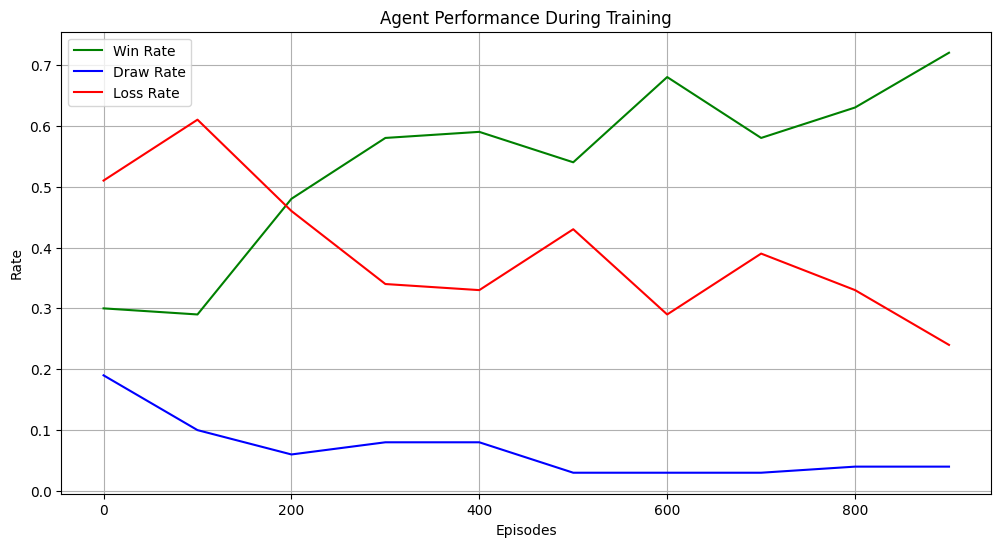

Evaluating Q-learning agent against Player...


100%|██████████| 100/100 [00:10<00:00,  9.31it/s]

Results: Win rate: 0.67, Draw rate: 0.06, Loss rate: 0.27


(0.67, 0.06, 0.27)

In [3]:
lin1_alpha = LinearQPlayer(id=1, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.999)
    
# create trainer
trainer = QTrainer(episodes=1000, stats_interval=100)

# train 
trainer.train_vs_random(lin1_alpha)

# plot training performance
trainer.plot_performance()

# evaluate 
random_opponent = Player(id=2)
trainer.evaluate(lin1_alpha, random_opponent, num_games=100)

Training Q-learning agent against random player...


 10%|█         | 100/1000 [00:23<04:35,  3.26it/s]

Episode 100/1000: Win Rate: 0.51, Draw Rate: 0.22, Loss Rate: 0.27


 20%|██        | 200/1000 [00:53<03:52,  3.44it/s]

Episode 200/1000: Win Rate: 0.52, Draw Rate: 0.05, Loss Rate: 0.43


 30%|███       | 300/1000 [01:21<03:41,  3.16it/s]

Episode 300/1000: Win Rate: 0.36, Draw Rate: 0.10, Loss Rate: 0.54


 40%|████      | 400/1000 [01:50<03:17,  3.04it/s]

Episode 400/1000: Win Rate: 0.45, Draw Rate: 0.01, Loss Rate: 0.54


 50%|█████     | 500/1000 [02:21<02:31,  3.30it/s]

Episode 500/1000: Win Rate: 0.42, Draw Rate: 0.07, Loss Rate: 0.51


 60%|██████    | 600/1000 [02:47<01:39,  4.03it/s]

Episode 600/1000: Win Rate: 0.25, Draw Rate: 0.02, Loss Rate: 0.73


 70%|███████   | 700/1000 [03:13<01:29,  3.34it/s]

Episode 700/1000: Win Rate: 0.28, Draw Rate: 0.03, Loss Rate: 0.69


 80%|████████  | 800/1000 [03:40<00:54,  3.68it/s]

Episode 800/1000: Win Rate: 0.36, Draw Rate: 0.04, Loss Rate: 0.60


 90%|█████████ | 900/1000 [04:08<00:26,  3.70it/s]

Episode 900/1000: Win Rate: 0.30, Draw Rate: 0.01, Loss Rate: 0.69


100%|██████████| 1000/1000 [04:38<00:00,  3.59it/s]

Episode 1000/1000: Win Rate: 0.53, Draw Rate: 0.02, Loss Rate: 0.45


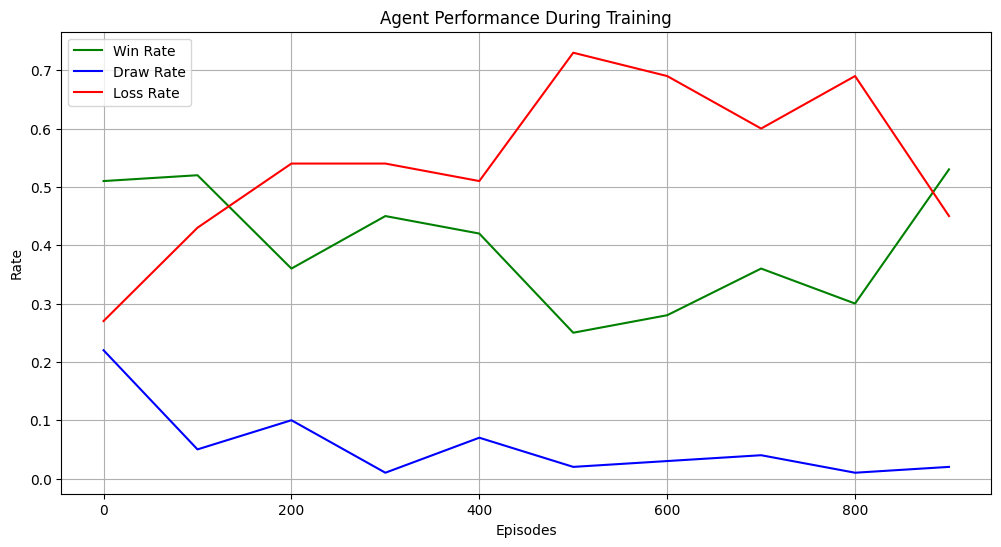

Evaluating Q-learning agent against Player...


100%|██████████| 100/100 [00:13<00:00,  7.26it/s]

Results: Win rate: 0.48, Draw rate: 0.04, Loss rate: 0.48


(0.48, 0.04, 0.48)

In [4]:
lin2_alpha = LinearQPlayer(id=1, learning_rate=0.01, discount_factor=0.9, exploration_rate=0.999)
    
# create trainer
trainer = QTrainer(episodes=1000, stats_interval=100)

# train 
trainer.train_vs_random(lin2_alpha)

# plot training performance
trainer.plot_performance()

# evaluate 
random_opponent = Player(id=2)
trainer.evaluate(lin2_alpha, random_opponent, num_games=100)

Training Q-learning agent against random player...


 10%|█         | 100/1000 [00:20<03:40,  4.09it/s]

Episode 100/1000: Win Rate: 0.77, Draw Rate: 0.09, Loss Rate: 0.14


 20%|██        | 200/1000 [00:45<03:24,  3.92it/s]

Episode 200/1000: Win Rate: 0.71, Draw Rate: 0.14, Loss Rate: 0.15


 30%|███       | 300/1000 [01:10<03:37,  3.22it/s]

Episode 300/1000: Win Rate: 0.71, Draw Rate: 0.11, Loss Rate: 0.18


 40%|████      | 400/1000 [01:38<02:39,  3.76it/s]

Episode 400/1000: Win Rate: 0.54, Draw Rate: 0.15, Loss Rate: 0.31


 50%|█████     | 500/1000 [02:06<02:19,  3.60it/s]

Episode 500/1000: Win Rate: 0.60, Draw Rate: 0.12, Loss Rate: 0.28


 60%|██████    | 601/1000 [02:33<01:30,  4.43it/s]

Episode 600/1000: Win Rate: 0.50, Draw Rate: 0.11, Loss Rate: 0.39


 70%|███████   | 700/1000 [02:58<01:18,  3.83it/s]

Episode 700/1000: Win Rate: 0.56, Draw Rate: 0.09, Loss Rate: 0.35


 80%|████████  | 801/1000 [03:23<00:45,  4.38it/s]

Episode 800/1000: Win Rate: 0.56, Draw Rate: 0.14, Loss Rate: 0.30


 90%|█████████ | 900/1000 [03:47<00:22,  4.35it/s]

Episode 900/1000: Win Rate: 0.53, Draw Rate: 0.14, Loss Rate: 0.33


100%|██████████| 1000/1000 [04:14<00:00,  3.93it/s]

Episode 1000/1000: Win Rate: 0.48, Draw Rate: 0.05, Loss Rate: 0.47


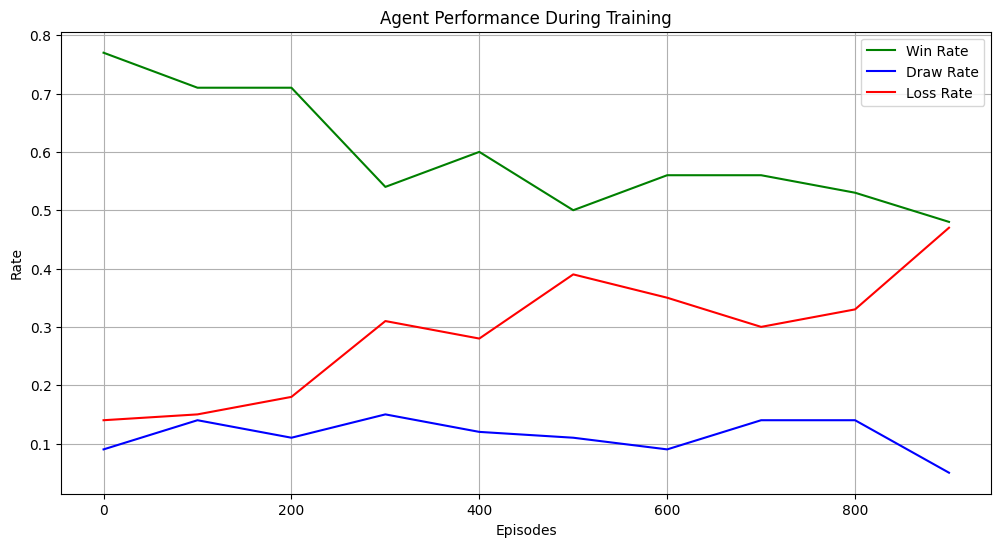

Evaluating Q-learning agent against Player...


100%|██████████| 100/100 [00:12<00:00,  8.08it/s]

Results: Win rate: 0.53, Draw rate: 0.09, Loss rate: 0.38


(0.53, 0.09, 0.38)

In [5]:
lin3_alpha = LinearQPlayer(id=1, learning_rate=0.001, discount_factor=0.9, exploration_rate=0.999)
    
# create trainer
trainer = QTrainer(episodes=1000, stats_interval=100)

# train 
trainer.train_vs_random(lin3_alpha)

# plot training performance
trainer.plot_performance()

# evaluate 
random_opponent = Player(id=2)
trainer.evaluate(lin3_alpha, random_opponent, num_games=100)

Training Q-learning agent against random player...


 10%|█         | 100/1000 [00:23<04:12,  3.57it/s]

Episode 100/1000: Win Rate: 0.33, Draw Rate: 0.19, Loss Rate: 0.48


 20%|██        | 200/1000 [00:48<03:55,  3.39it/s]

Episode 200/1000: Win Rate: 0.67, Draw Rate: 0.04, Loss Rate: 0.29


 30%|███       | 300/1000 [01:13<02:48,  4.16it/s]

Episode 300/1000: Win Rate: 0.65, Draw Rate: 0.06, Loss Rate: 0.29


 40%|████      | 401/1000 [01:38<02:11,  4.56it/s]

Episode 400/1000: Win Rate: 0.66, Draw Rate: 0.03, Loss Rate: 0.31


 50%|█████     | 500/1000 [02:04<01:55,  4.33it/s]

Episode 500/1000: Win Rate: 0.79, Draw Rate: 0.02, Loss Rate: 0.19


 60%|██████    | 600/1000 [02:28<01:48,  3.67it/s]

Episode 600/1000: Win Rate: 0.52, Draw Rate: 0.09, Loss Rate: 0.39


 70%|███████   | 700/1000 [02:53<01:06,  4.50it/s]

Episode 700/1000: Win Rate: 0.57, Draw Rate: 0.06, Loss Rate: 0.37


 80%|████████  | 800/1000 [03:18<00:57,  3.47it/s]

Episode 800/1000: Win Rate: 0.64, Draw Rate: 0.03, Loss Rate: 0.33


 90%|█████████ | 901/1000 [03:42<00:21,  4.62it/s]

Episode 900/1000: Win Rate: 0.75, Draw Rate: 0.05, Loss Rate: 0.20


100%|██████████| 1000/1000 [04:06<00:00,  4.06it/s]


Episode 1000/1000: Win Rate: 0.57, Draw Rate: 0.03, Loss Rate: 0.40


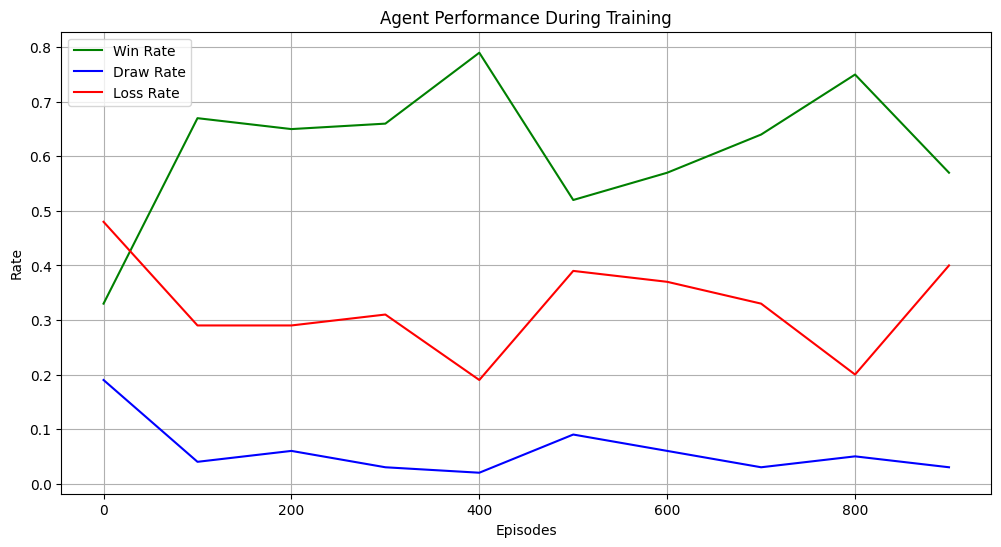

Evaluating Q-learning agent against Player...


100%|██████████| 100/100 [00:10<00:00,  9.17it/s]

Results: Win rate: 0.69, Draw rate: 0.04, Loss rate: 0.27


(0.69, 0.04, 0.27)

In [6]:
lin4_alpha = LinearQPlayer(id=1, learning_rate=0.2, discount_factor=0.9, exploration_rate=0.999)
    
# create trainer
trainer = QTrainer(episodes=1000, stats_interval=100)

# train 
trainer.train_vs_random(lin4_alpha)

# plot training performance
trainer.plot_performance()

# evaluate 
random_opponent = Player(id=2)
trainer.evaluate(lin4_alpha, random_opponent, num_games=100)

Training Q-learning agent against random player...


 10%|█         | 100/1000 [00:23<03:25,  4.38it/s]

Episode 100/1000: Win Rate: 0.43, Draw Rate: 0.18, Loss Rate: 0.39


 20%|██        | 200/1000 [00:48<03:13,  4.14it/s]

Episode 200/1000: Win Rate: 0.50, Draw Rate: 0.10, Loss Rate: 0.40


 30%|███       | 300/1000 [01:13<02:48,  4.15it/s]

Episode 300/1000: Win Rate: 0.55, Draw Rate: 0.05, Loss Rate: 0.40


 40%|████      | 400/1000 [01:39<02:33,  3.90it/s]

Episode 400/1000: Win Rate: 0.54, Draw Rate: 0.03, Loss Rate: 0.43


 50%|█████     | 500/1000 [02:04<01:46,  4.68it/s]

Episode 500/1000: Win Rate: 0.63, Draw Rate: 0.01, Loss Rate: 0.36


 60%|██████    | 600/1000 [02:29<01:46,  3.76it/s]

Episode 600/1000: Win Rate: 0.55, Draw Rate: 0.09, Loss Rate: 0.36


 70%|███████   | 700/1000 [02:56<01:23,  3.58it/s]

Episode 700/1000: Win Rate: 0.61, Draw Rate: 0.09, Loss Rate: 0.30


 80%|████████  | 801/1000 [03:22<00:48,  4.11it/s]

Episode 800/1000: Win Rate: 0.43, Draw Rate: 0.03, Loss Rate: 0.54


 90%|█████████ | 900/1000 [03:47<00:24,  4.06it/s]

Episode 900/1000: Win Rate: 0.53, Draw Rate: 0.05, Loss Rate: 0.42


100%|██████████| 1000/1000 [04:13<00:00,  3.95it/s]

Episode 1000/1000: Win Rate: 0.56, Draw Rate: 0.08, Loss Rate: 0.36


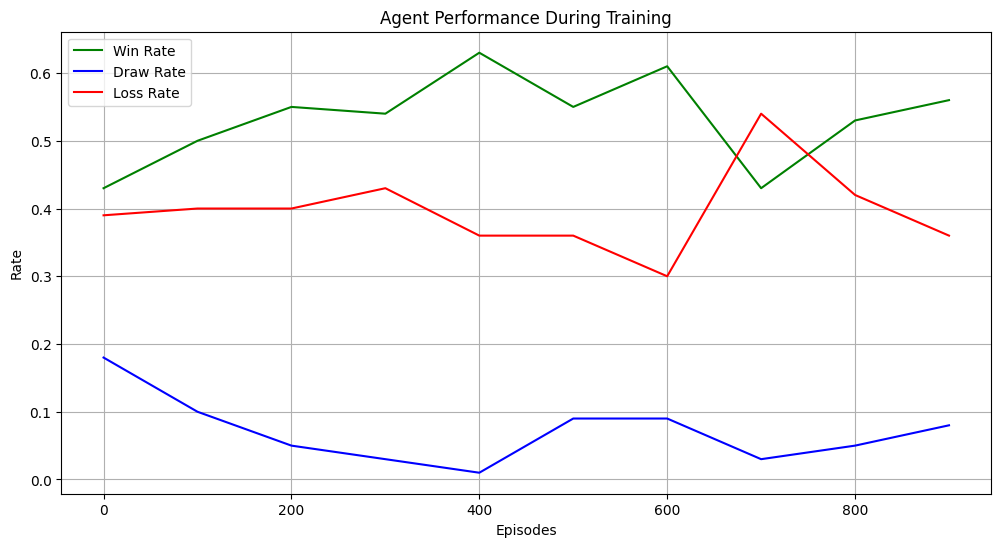

Evaluating Q-learning agent against Player...


100%|██████████| 100/100 [00:13<00:00,  7.66it/s]

Results: Win rate: 0.33, Draw rate: 0.05, Loss rate: 0.62


(0.33, 0.05, 0.62)

In [7]:
lin5_alpha = LinearQPlayer(id=1, learning_rate=0.5, discount_factor=0.9, exploration_rate=0.999)
    
# create trainer
trainer = QTrainer(episodes=1000, stats_interval=100)

# train 
trainer.train_vs_random(lin5_alpha)

# plot training performance
trainer.plot_performance()

# evaluate 
random_opponent = Player(id=2)
trainer.evaluate(lin5_alpha, random_opponent, num_games=100)

Training Q-learning agent against random player...


 10%|█         | 100/1000 [00:23<03:20,  4.50it/s]

Episode 100/1000: Win Rate: 0.26, Draw Rate: 0.17, Loss Rate: 0.57


 20%|██        | 200/1000 [00:47<03:20,  3.99it/s]

Episode 200/1000: Win Rate: 0.52, Draw Rate: 0.10, Loss Rate: 0.38


 30%|███       | 301/1000 [01:13<02:41,  4.32it/s]

Episode 300/1000: Win Rate: 0.69, Draw Rate: 0.09, Loss Rate: 0.22


 40%|████      | 401/1000 [01:38<02:30,  3.97it/s]

Episode 400/1000: Win Rate: 0.73, Draw Rate: 0.03, Loss Rate: 0.24


 50%|█████     | 501/1000 [02:03<01:43,  4.80it/s]

Episode 500/1000: Win Rate: 0.68, Draw Rate: 0.04, Loss Rate: 0.28


 60%|██████    | 600/1000 [02:27<01:42,  3.91it/s]

Episode 600/1000: Win Rate: 0.48, Draw Rate: 0.06, Loss Rate: 0.46


 70%|███████   | 701/1000 [02:51<01:01,  4.87it/s]

Episode 700/1000: Win Rate: 0.65, Draw Rate: 0.11, Loss Rate: 0.24


 80%|████████  | 800/1000 [03:17<00:48,  4.16it/s]

Episode 800/1000: Win Rate: 0.64, Draw Rate: 0.05, Loss Rate: 0.31


 90%|█████████ | 900/1000 [03:40<00:19,  5.05it/s]

Episode 900/1000: Win Rate: 0.59, Draw Rate: 0.07, Loss Rate: 0.34


100%|██████████| 1000/1000 [04:04<00:00,  4.10it/s]


Episode 1000/1000: Win Rate: 0.56, Draw Rate: 0.02, Loss Rate: 0.42


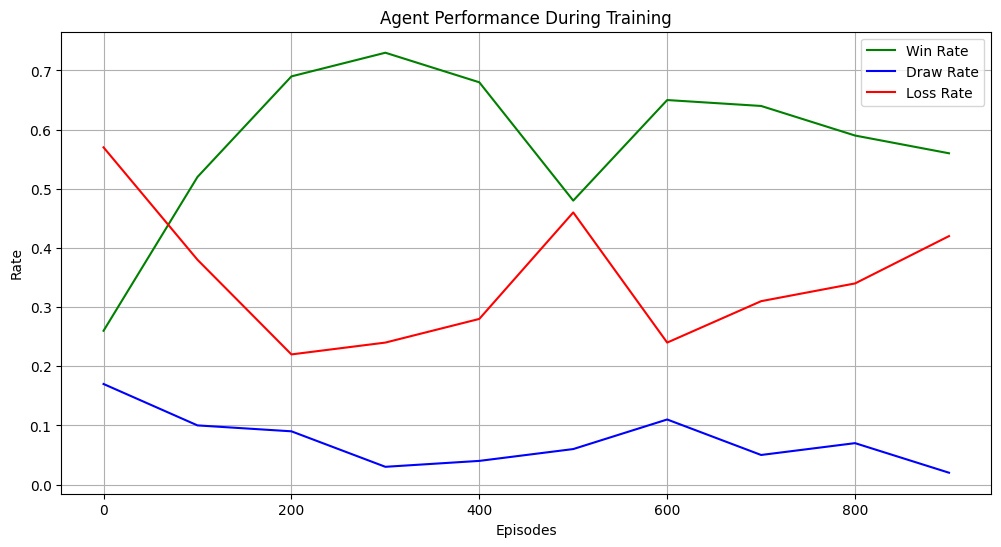

Evaluating Q-learning agent against Player...


100%|██████████| 100/100 [00:11<00:00,  8.93it/s]

Results: Win rate: 0.71, Draw rate: 0.06, Loss rate: 0.23


(0.71, 0.06, 0.23)

In [8]:
lin2_gamma = LinearQPlayer(id=1, learning_rate=0.2, discount_factor=0.9, exploration_rate=0.999)

# create trainer
trainer = QTrainer(episodes=1000, stats_interval=100)

# train 
trainer.train_vs_random(lin2_gamma)

# plot training performance
trainer.plot_performance()

# evaluate 
random_opponent = Player(id=2)
trainer.evaluate(lin2_gamma, random_opponent, num_games=100)

Training Q-learning agent against random player...


 10%|█         | 100/1000 [00:22<03:00,  4.98it/s]

Episode 100/1000: Win Rate: 0.52, Draw Rate: 0.12, Loss Rate: 0.36


 20%|██        | 201/1000 [00:45<02:43,  4.90it/s]

Episode 200/1000: Win Rate: 0.52, Draw Rate: 0.05, Loss Rate: 0.43


 30%|███       | 301/1000 [01:10<02:39,  4.39it/s]

Episode 300/1000: Win Rate: 0.68, Draw Rate: 0.05, Loss Rate: 0.27


 40%|████      | 400/1000 [01:35<02:08,  4.66it/s]

Episode 400/1000: Win Rate: 0.49, Draw Rate: 0.02, Loss Rate: 0.49


 50%|█████     | 501/1000 [01:59<01:51,  4.48it/s]

Episode 500/1000: Win Rate: 0.68, Draw Rate: 0.03, Loss Rate: 0.29


 60%|██████    | 600/1000 [02:22<01:28,  4.51it/s]

Episode 600/1000: Win Rate: 0.52, Draw Rate: 0.06, Loss Rate: 0.42


 70%|███████   | 701/1000 [02:47<00:59,  5.02it/s]

Episode 700/1000: Win Rate: 0.61, Draw Rate: 0.09, Loss Rate: 0.30


 80%|████████  | 801/1000 [03:10<00:45,  4.34it/s]

Episode 800/1000: Win Rate: 0.59, Draw Rate: 0.03, Loss Rate: 0.38


 90%|█████████ | 900/1000 [03:34<00:22,  4.35it/s]

Episode 900/1000: Win Rate: 0.66, Draw Rate: 0.03, Loss Rate: 0.31


100%|██████████| 1000/1000 [03:57<00:00,  4.21it/s]

Episode 1000/1000: Win Rate: 0.63, Draw Rate: 0.04, Loss Rate: 0.33


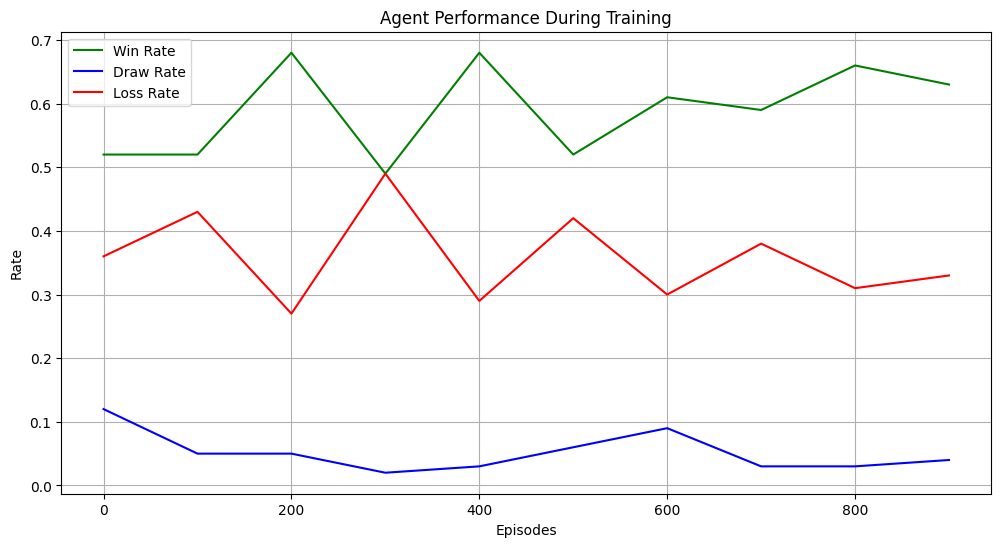

Evaluating Q-learning agent against Player...


100%|██████████| 100/100 [00:12<00:00,  7.78it/s]

Results: Win rate: 0.33, Draw rate: 0.04, Loss rate: 0.63


(0.33, 0.04, 0.63)

In [9]:
lin2_gamma = LinearQPlayer(id=1, learning_rate=0.2, discount_factor=0.7, exploration_rate=0.999)

# create trainer
trainer = QTrainer(episodes=1000, stats_interval=100)

# train 
trainer.train_vs_random(lin2_gamma)

# plot training performance
trainer.plot_performance()

# evaluate 
random_opponent = Player(id=2)
trainer.evaluate(lin2_gamma, random_opponent, num_games=100)

Training Q-learning agent against random player...


 10%|█         | 100/1000 [00:22<03:51,  3.88it/s]

Episode 100/1000: Win Rate: 0.56, Draw Rate: 0.13, Loss Rate: 0.31


 20%|██        | 201/1000 [00:48<03:14,  4.10it/s]

Episode 200/1000: Win Rate: 0.61, Draw Rate: 0.08, Loss Rate: 0.31


 30%|███       | 300/1000 [01:13<02:56,  3.97it/s]

Episode 300/1000: Win Rate: 0.63, Draw Rate: 0.07, Loss Rate: 0.30


 40%|████      | 400/1000 [01:38<02:56,  3.41it/s]

Episode 400/1000: Win Rate: 0.51, Draw Rate: 0.06, Loss Rate: 0.43


 50%|█████     | 500/1000 [02:03<02:08,  3.91it/s]

Episode 500/1000: Win Rate: 0.66, Draw Rate: 0.15, Loss Rate: 0.19


 60%|██████    | 600/1000 [02:27<01:23,  4.80it/s]

Episode 600/1000: Win Rate: 0.61, Draw Rate: 0.01, Loss Rate: 0.38


 70%|███████   | 700/1000 [02:51<01:25,  3.52it/s]

Episode 700/1000: Win Rate: 0.63, Draw Rate: 0.05, Loss Rate: 0.32


 80%|████████  | 800/1000 [03:17<01:00,  3.33it/s]

Episode 800/1000: Win Rate: 0.75, Draw Rate: 0.01, Loss Rate: 0.24


 90%|█████████ | 901/1000 [03:41<00:19,  5.03it/s]

Episode 900/1000: Win Rate: 0.56, Draw Rate: 0.08, Loss Rate: 0.36


100%|██████████| 1000/1000 [04:05<00:00,  4.08it/s]


Episode 1000/1000: Win Rate: 0.59, Draw Rate: 0.06, Loss Rate: 0.35


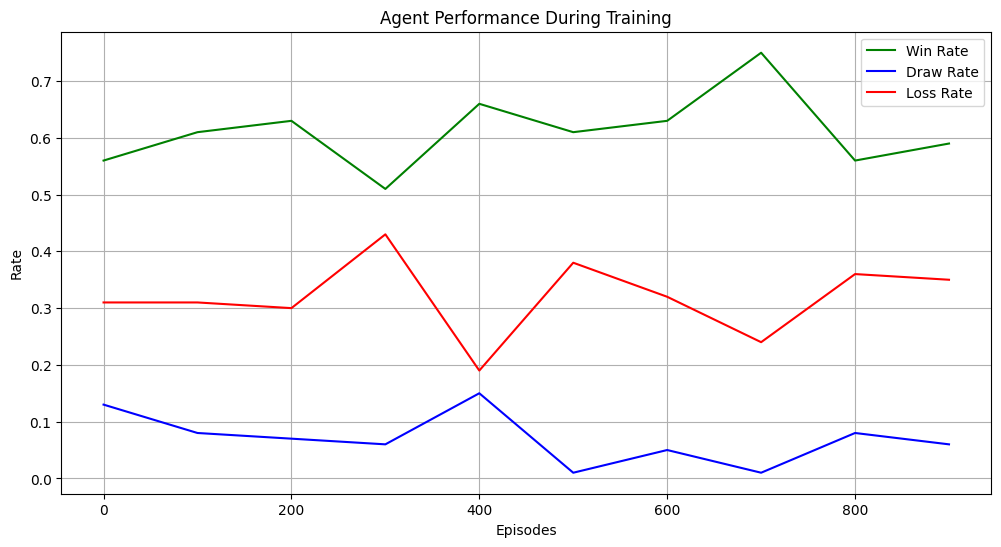

Evaluating Q-learning agent against Player...


100%|██████████| 100/100 [00:12<00:00,  8.12it/s]

Results: Win rate: 0.71, Draw rate: 0.05, Loss rate: 0.24


(0.71, 0.05, 0.24)

In [10]:
lin3_gamma = LinearQPlayer(id=1, learning_rate=0.2, discount_factor=0.5, exploration_rate=0.999)
    
# create trainer
trainer = QTrainer(episodes=1000, stats_interval=100)

# train 
trainer.train_vs_random(lin3_gamma)

# plot training performance
trainer.plot_performance()

# evaluate 
random_opponent = Player(id=2)
trainer.evaluate(lin3_gamma, random_opponent, num_games=100)